In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv("D:\SDA Cursuri\Exploratory Data Analysis\globalterrorismdb_0718dist.csv", encoding = 'latin1')

In [32]:
df.shape

(181691, 135)

In [46]:
df['motive'].unique()

array([nan, 'To protest the Cairo Illinois Police Deparment',
       'To protest the War in Vietnam and the draft', ...,
       'The specific motive is unknown; however, sources stated that the attack was carried out in retaliation for the death of Noor Mohammad Tantray (Noor Trali), a Jaish-e-Mohammad (JeM) leader, by security personnel on December 26, 2017 in Pulwama.',
       'The specific motive is unknown; however, sources noted that the targeted building housed migrants.',
       'The specific motive is unknown; however, sources stated that the Taliban had warned one of the victims against collaborating with the government.'],
      dtype=object)

In [34]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [44]:
df.rename(columns = {'iyear':'Year',
                    'imonth':'Month',
                    'iday':'Day',
                    'gname':'Group',
                    'country_txt':'Country',
                    'region_txt':'Region',
                    'provstate':'State',
                    'city':'City',
                    'attacktype1_txt':'Attacktype',
                    'targtype1_txt':'Targettype',
                    'weaptype1_txt':'Weapon',
                    'nkill':'kill',
                    'nwound':'Wound',
                    }, inplace = True)

In [47]:
data = df[['Year', 'Month',
                    'Day',
                    'Group',
                    'Country',
                    'Region',
                    'State',
                    'City',
           'latitude', 'longitude', 'summary', 'motive',
                    'Attacktype',
                    'Targettype',
                    'Weapon',
                    'kill',
                    'Wound']]

In [48]:
data.head()

,Year,Month,Day,Group,Country,Region,State,City,latitude,longitude,summary,motive,Attacktype,Targettype,Weapon,kill,Wound
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Unknown,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Unknown,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN


In [49]:
data.shape

(181691, 17)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Group       181691 non-null  object 
 4   Country     181691 non-null  object 
 5   Region      181691 non-null  object 
 6   State       181270 non-null  object 
 7   City        181256 non-null  object 
 8   latitude    177135 non-null  float64
 9   longitude   177134 non-null  float64
 10  summary     115562 non-null  object 
 11  motive      50561 non-null   object 
 12  Attacktype  181691 non-null  object 
 13  Targettype  181691 non-null  object 
 14  Weapon      181691 non-null  object 
 15  kill        171378 non-null  float64
 16  Wound       165380 non-null  float64
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [51]:
data.isnull().sum()

Year               0
Month              0
Day                0
Group              0
Country            0
Region             0
State            421
City             435
latitude        4556
longitude       4557
summary        66129
motive        131130
Attacktype         0
Targettype         0
Weapon             0
kill           10313
Wound          16311
dtype: int64

In [52]:
year = data['Year'].unique()

years_count = data['Year'].value_counts(dropna = False).sort_index()

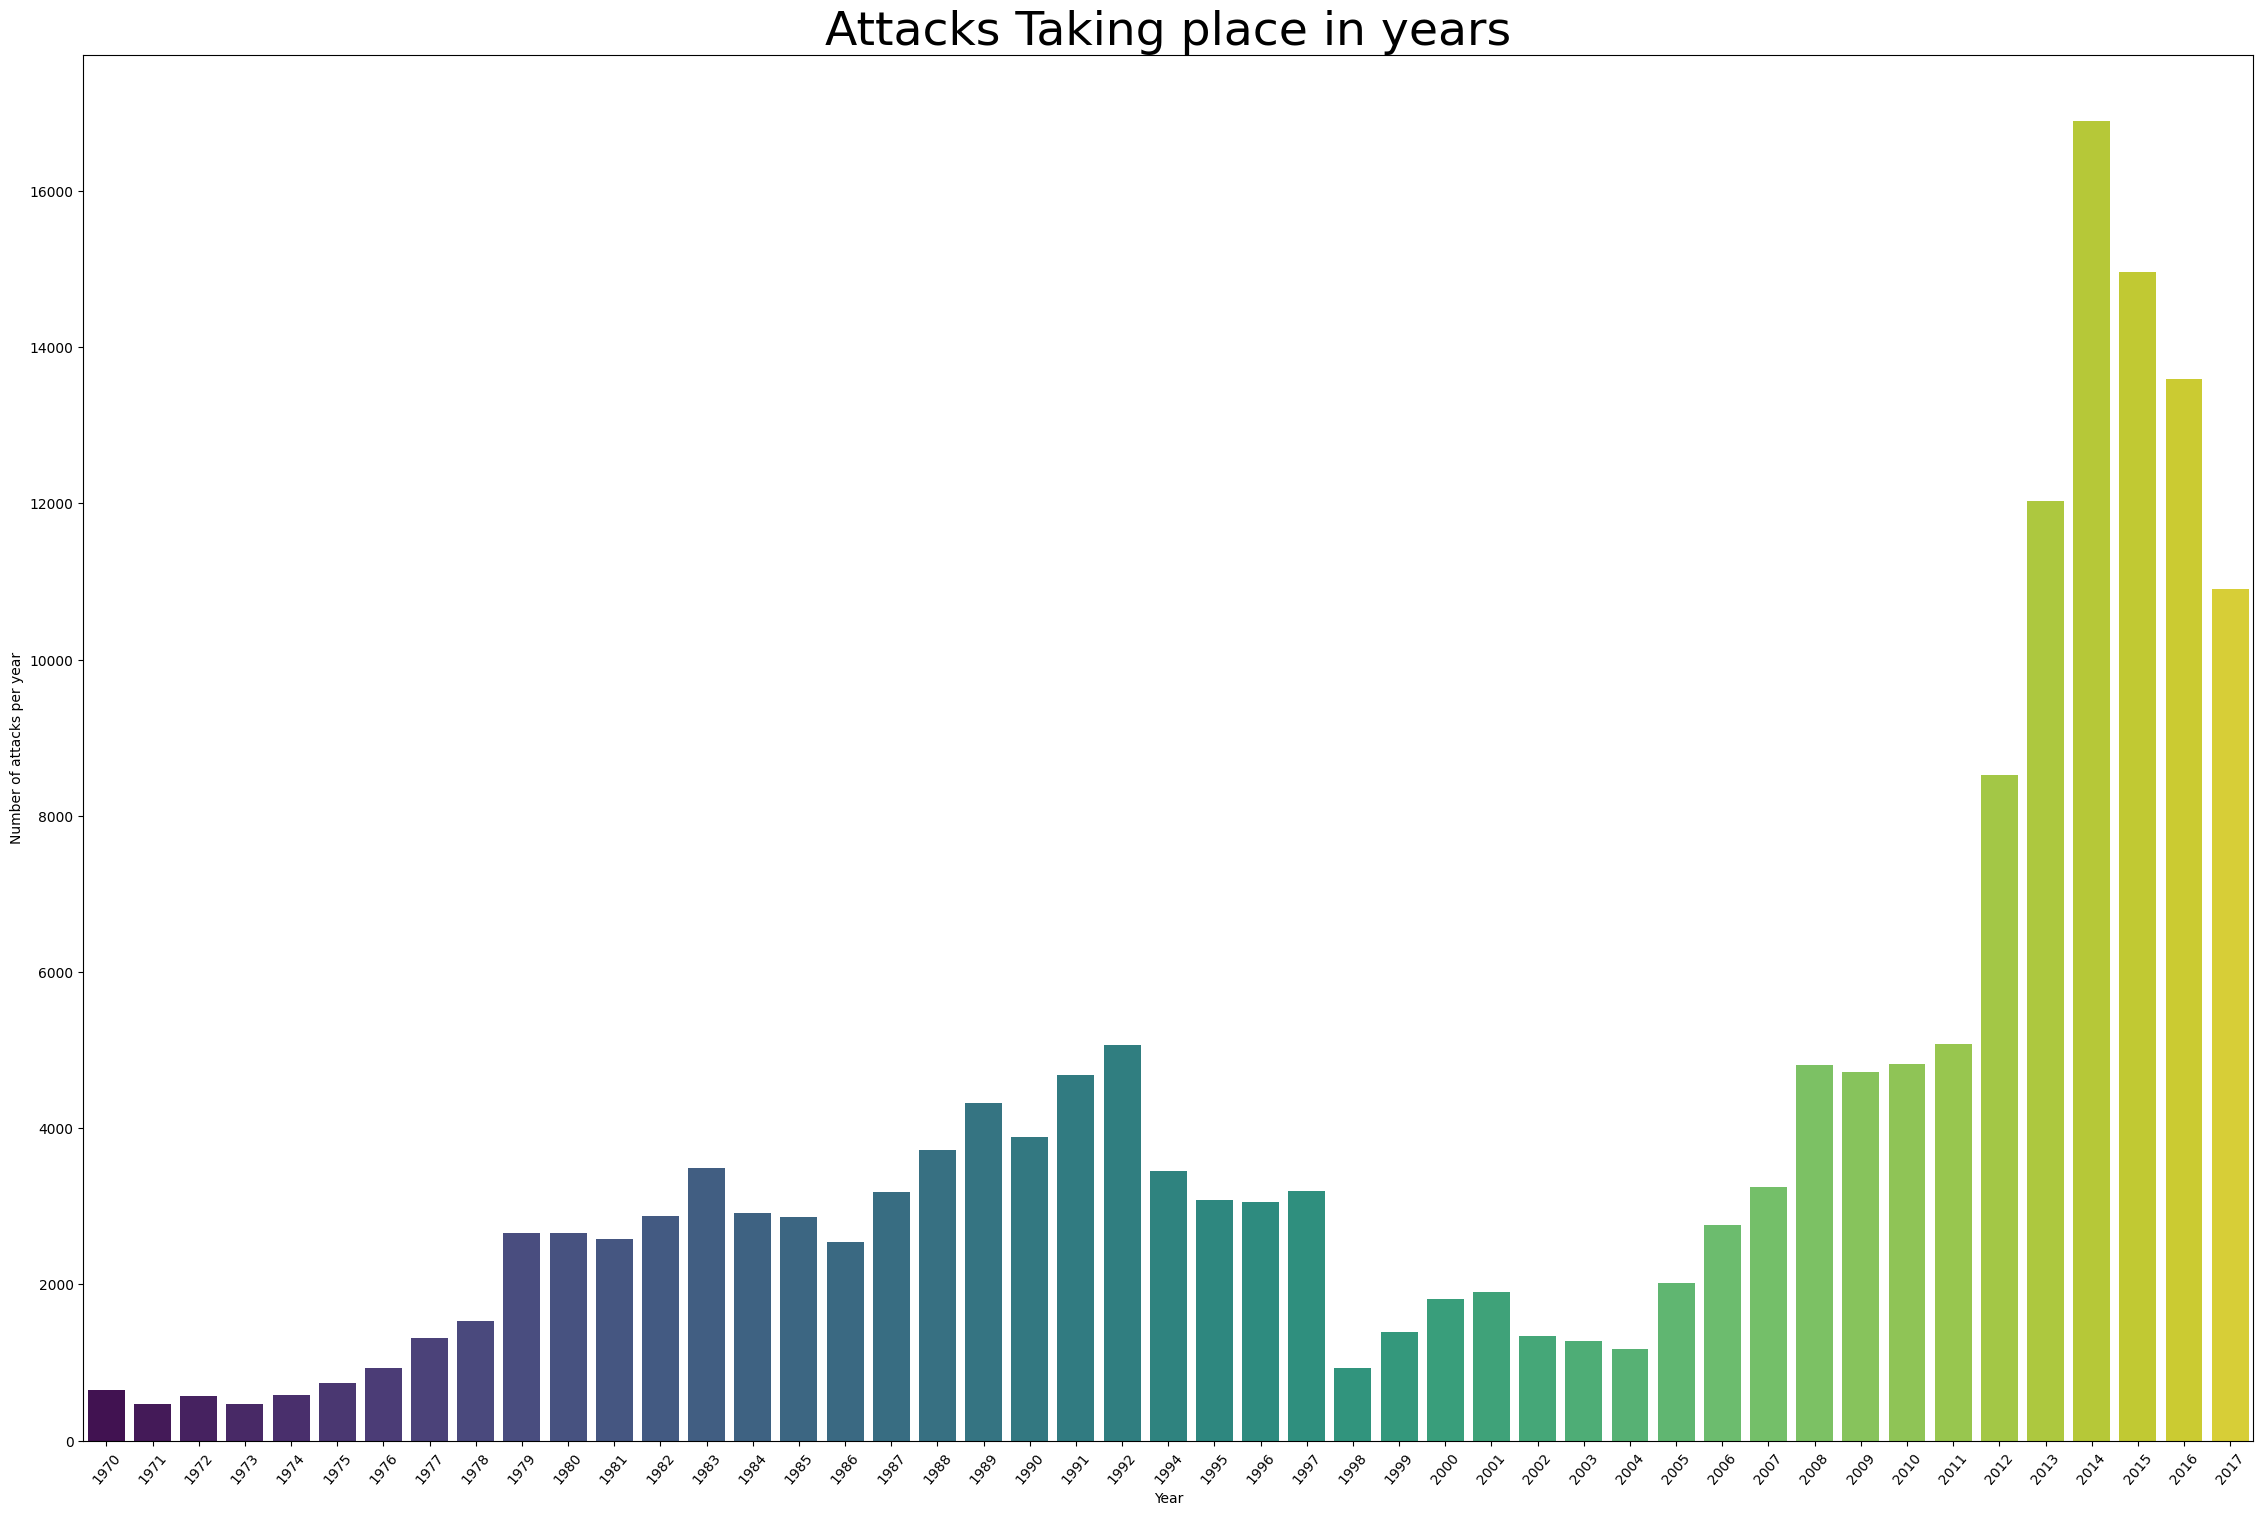

In [56]:
plt.figure(figsize = (28, 18))
sns.barplot(x = year, y = years_count, palette = 'viridis')
plt.xticks(rotation = 50)
plt.title('Attacks Taking place in years', fontsize = 34)
plt.xlabel('Year')
plt.ylabel('Number of attacks per year')

plt.show()

<Axes: xlabel='Year'>

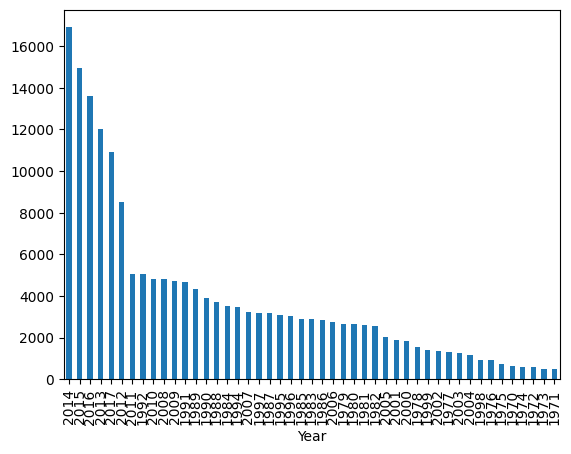

In [57]:
data['Year'].value_counts().plot(kind = 'bar')

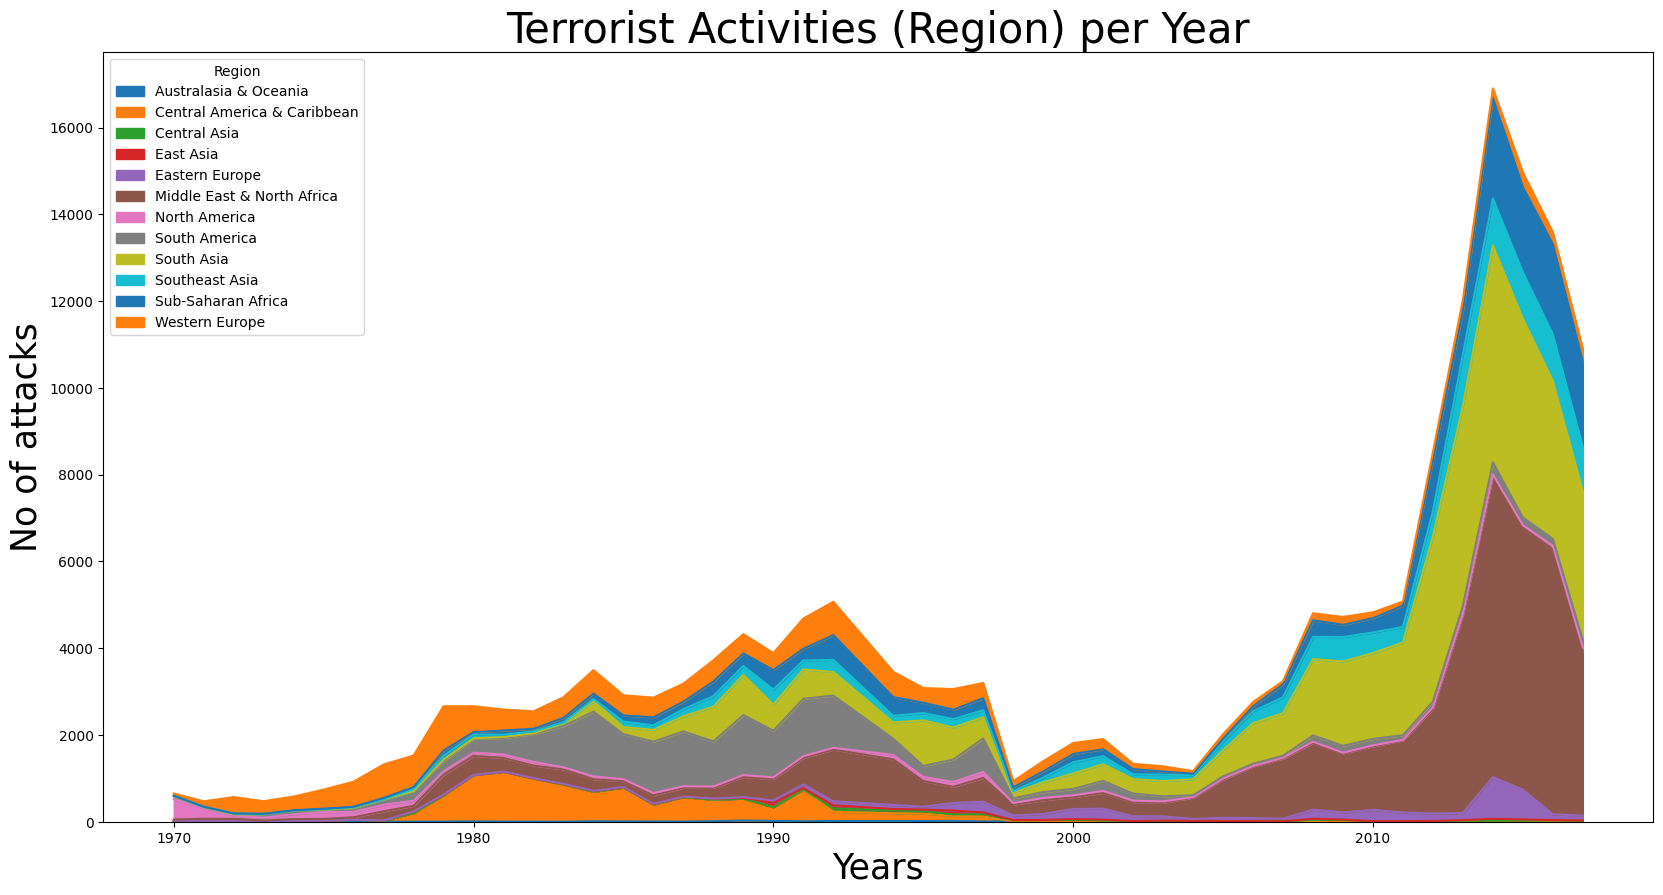

In [59]:
pd.crosstab(data['Year'], data['Region']).plot(kind = 'area', stacked = True, figsize = (20,10))

plt.ylabel('No of attacks', fontsize = 25)
plt.xlabel('Years', fontsize = 25)
plt.title('Terrorist Activities (Region) per Year', fontsize = 30)
plt.show()

In [61]:
#pd.crosstab(data['Year'], data['Region'])

In [62]:
attack = data['Country'].value_counts()[:10]

attack

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

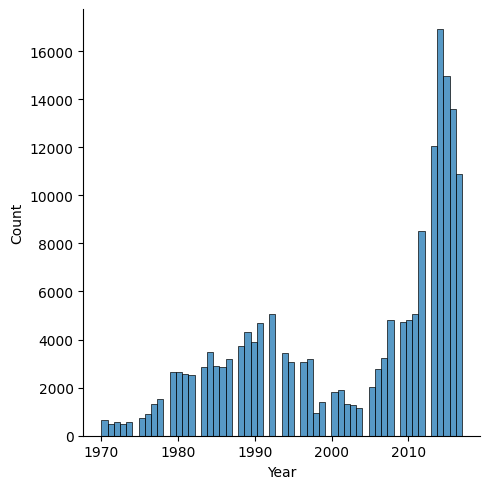

In [65]:
sns.displot(data = data, x = 'Year', kind = 'hist', multiple = 'stack')
plt.show()

<Axes: xlabel='Month'>

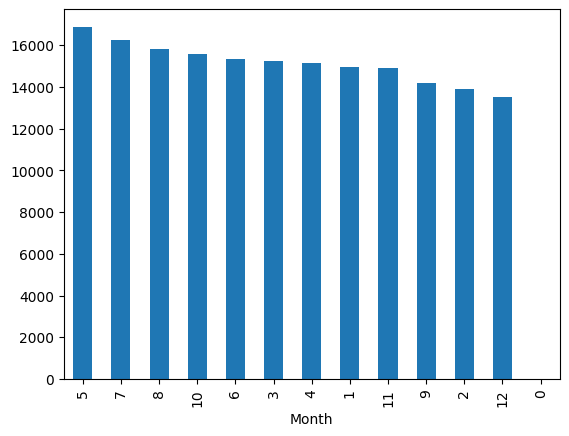

In [66]:
data['Month'].value_counts().plot(kind = 'bar')

In [68]:
data['Group'].value_counts()[1:10]

Group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: count, dtype: int64

In [69]:
df = data[['Year', 'kill']].groupby('Year').sum()

<Axes: xlabel='Year'>

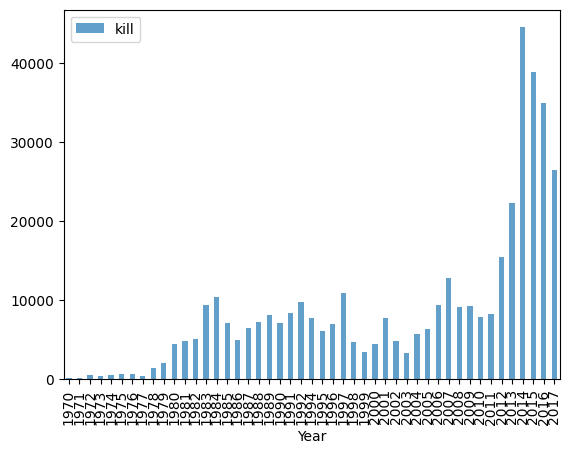

In [70]:
df.plot(kind = 'bar', alpha = 0.7)

<Axes: xlabel='City'>

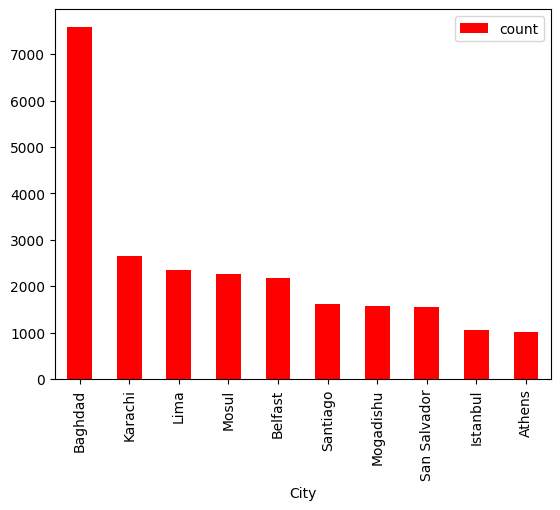

In [76]:
data['City'].value_counts().to_frame().sort_values('count', axis = 0, ascending = False)[1:11].plot(kind = 'bar', color = 'red')

<Axes: xlabel='Country'>

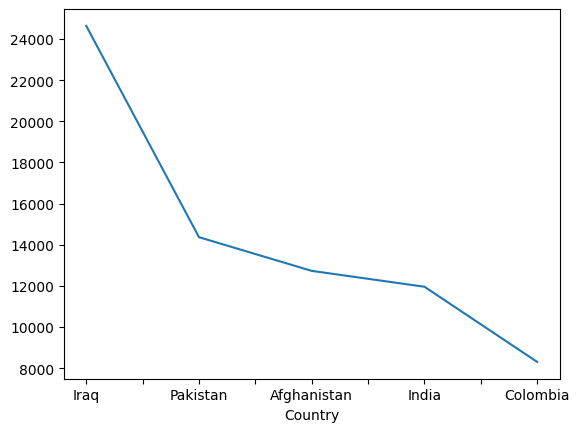

In [77]:
data['Country'].value_counts().head().plot(kind = 'line')

<Axes: xlabel='Region'>

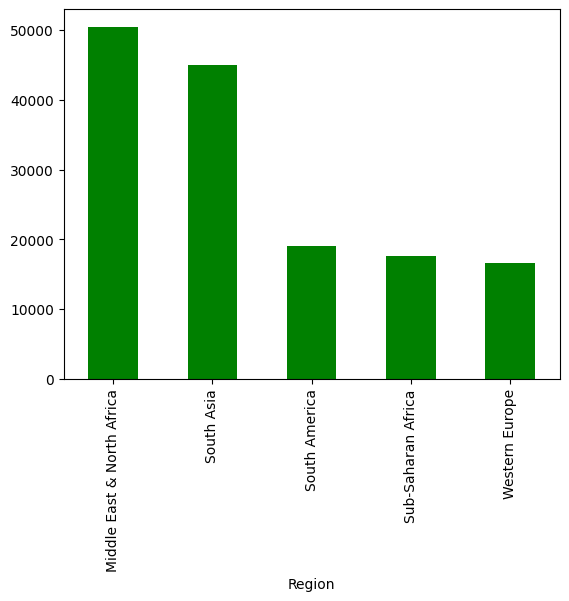

In [78]:
data['Region'].value_counts().head().plot(kind = 'bar', color = 'green')

In [79]:
data['Region'].value_counts().head()

Region
Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: count, dtype: int64

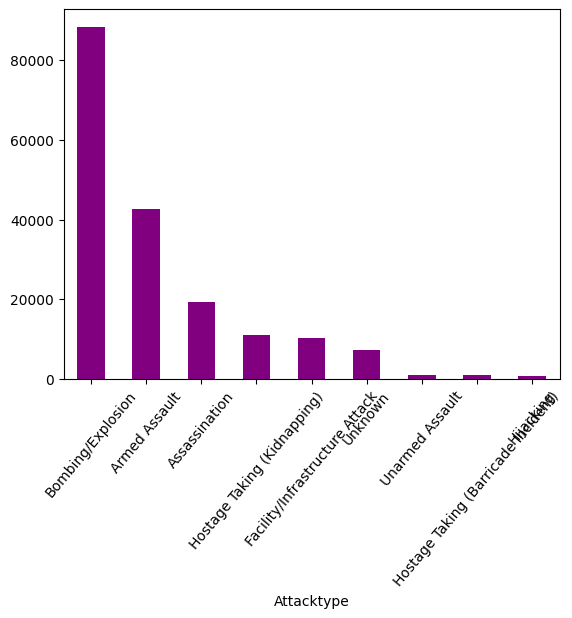

In [81]:
data['Attacktype'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xticks(rotation = 50)
plt.show()

In [82]:
data['Attacktype'].value_counts()

Attacktype
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

<Axes: xlabel='Attacktype'>

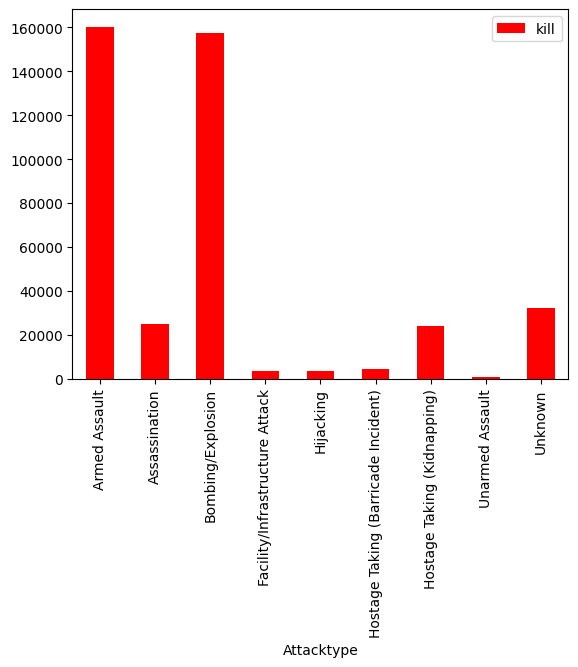

In [83]:
data[['Attacktype', 'kill']].groupby('Attacktype').sum().plot(kind = 'bar', color = 'red')

<Axes: xlabel='Group'>

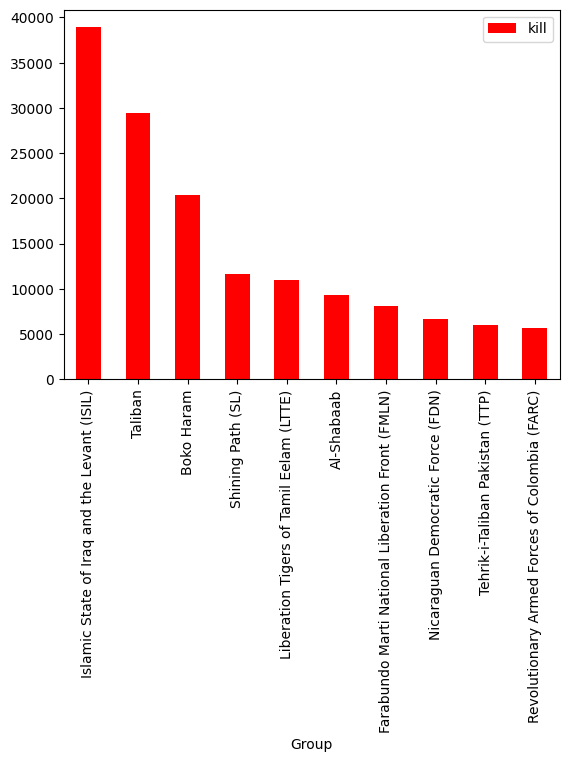

In [86]:
data[['Group', 'kill']].groupby('Group').sum().drop('Unknown').sort_values('kill', ascending = False)[:10].plot(kind = 'bar', color = 'red')